In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import math

In [2]:
uzh_colors = {'blue': '#0028a5', 'blue_80': '#3353b7', 'blue_60': '#667ec9', 'blue_40': '#99a9db', 'blue_20': '#ccd4ed',
               'red': '#dc6027', 'red_80': '#e38052', 'red_60': '#eaa07d', 'red_40': '#f1bfa9', 'red_20': '#f8dfd4',
               'green': '#91c34a', 'green_80': '#aad470', 'green_60': '#bfdf94', 'green_40': '#d5e9b7', 'green_20': '#eaf4db',
               'yellow': '#fede00', 'yellow_80': '#fbe651', 'yellow_60': '#fcec7c', 'yellow_40': '#fdf3a8', 'yellow_20': '#fef9d3',
               'grey': '#a3adb7', 'grey_80': '#b5bdc5', 'grey_60': '#c8ced4', 'grey_40': '#dadee2', 'grey_20': '#edeff1',
               'turquoise': '#0b82a0', 'turquoise_80': '#3c9fb6', 'turquoise_60': '#6bb7c7', 'turquoise_40': '#9ed0d9', 'turquoise_20': '#cfe8ec',
               'green2': '#2a7f62', 'green2_80': '#569d85', 'green2_60': '#80b6a4', 'green2_40': '#abcec2', 'green2_20': '#d5e7e1'}

In [3]:
df = pd.read_csv('./Tx_fee_Eth_Hbar_age.csv')
df_hbar = df.fee_tinybar/1e8 #tinybar -> hbar

In [4]:
y_h = list(df_hbar.values)

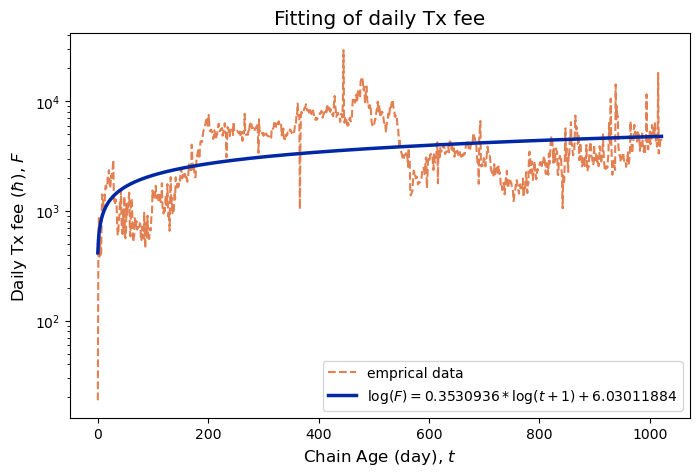

In [5]:
x_h = list(df_hbar.index+1)
X_h_log = np.log(x_h)

y_h = list(df_hbar.values)
Y_h_log = np.log(y_h)

p = np.polyfit(X_h_log, Y_h_log, 1)

Y_fit_h_log = [p[0] * i + p[1] for i in X_h_log]


Y_fit_h = np.exp(Y_fit_h_log)

fig = plt.figure(figsize=(8,5))

X_axis_h = list(df_hbar.index)
plt.plot(X_axis_h, y_h, linestyle='--' ,label = 'emprical data', color=uzh_colors['red_80'])
plt.plot(X_axis_h, Y_fit_h, label = '$\log(F) =  0.3530936 * \log(t+1)+6.03011884 $', linewidth=2.5, color=uzh_colors['blue'])

plt.yscale('log')

plt.title('Fitting of daily Tx fee', fontsize = 'x-large')

plt.legend()

plt.xlabel('Chain Age (day), $t$', fontsize = 'large')
plt.ylabel('Daily Tx fee ($\hbar$), $F$ ', fontsize = 'large')

plt.savefig('./Fitting of daily Tx fee.png', dpi =200)

In [6]:
p 

array([0.3530936 , 6.03011884])

In [7]:
Y_Tx_fee = []
for t in range(1, 365*30):
    Tx_fee_t = p[0] * np.log(t) + p[1]
    Y_Tx_fee.append(Tx_fee_t)
Y_fee = [np.exp(i) for i in Y_Tx_fee]     

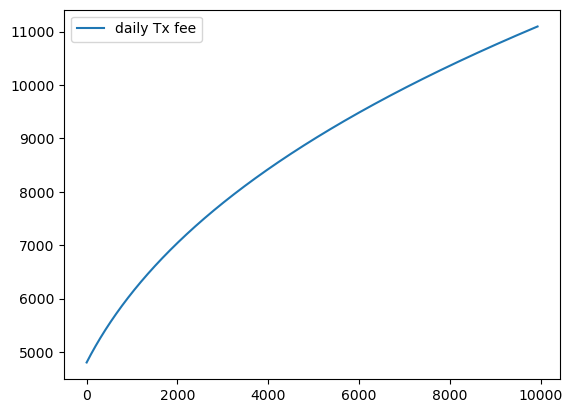

In [9]:
plt.plot(Y_fee[1022:], label = 'daily Tx fee') #predicted Tx fee after age: 1022 days -> 30. June 2022 

plt.legend()

In [10]:
Total_fee_year = {}

for y in range(1,11,1): # Yearly total reward for 10 years in future
    Total_fee_year[y] = sum(Y_fee[1022 + 365*(y-1): 1022+365*y])

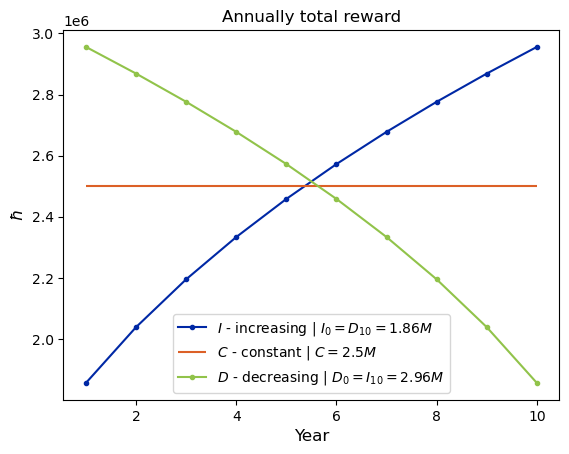

In [11]:
X_index = list(Total_fee_year.keys())

Total_reward_year_in = list(Total_fee_year.values()) #increasing reward payout function

Total_reward_year_de = Total_reward_year_in[: :-1] # decreasing reward payout function

Total_reward_year_co = np.mean(Total_reward_year_in) # constent reward payout function

plt.plot(X_index, Total_reward_year_in, '.-' , color = uzh_colors['blue'], label= '$I$ - increasing | $I_0 = D_{10} = 1.86M$')
#plt.hlines( Total_reward_year_co, 1, 10 , label= 'constant | $C = 2.47M$')

plt.hlines( 2.5e6, 1, 10 , color = uzh_colors['red'], label= '$C$ - constant | $C = 2.5M$')
plt.plot(X_index, Total_reward_year_de, '.-', color = uzh_colors['green'], label= '$D$ - decreasing | $D_0 = I_{10} = 2.96M$')

plt.legend()

plt.ylabel('$\hbar$', fontsize = 'large')
plt.xlabel('Year', fontsize = 'large')   

plt.title('Annually total reward', fontsize = 'large')

plt.savefig('./Annually total reward.png', dpi=200)

In [12]:
Total_reward_year_co # ~2.5M

2473397.8103368757